In [28]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [29]:
import cv2 as cv
from utils.io_utils import get_images, output_calib_results, draw_detections
from utils.calib_utils import detect_keypoints

In [30]:
pattern_size = (8, 6)
edge_length = 0.035
data_path = "/home/konstantin/datasets/bandeja-sequence/samsung/20201117_185235_CHESS"

In [31]:
images = get_images(data_path, period=4)

In [32]:
len(images)

14

In [33]:
results = detect_keypoints(images, pattern_size, edge_length)

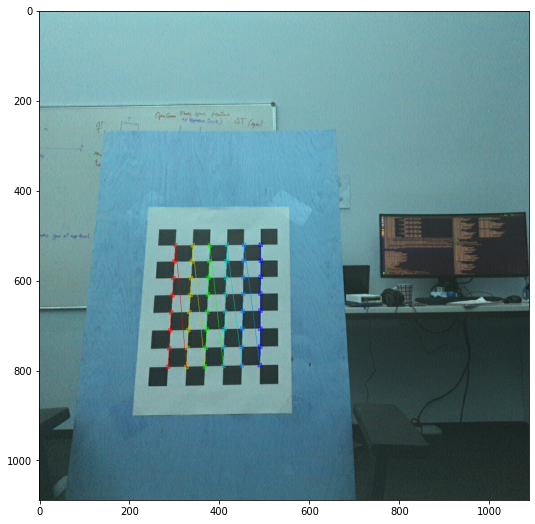

In [34]:
draw_detections(images, results, pattern_size, 0, normalize=True)

In [35]:
criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 30, 0.0001)

scene_points, loc_kp = to_lists(results)

shape = images[list(images.keys())[0]].shape[::-1][1:]

# Note: K3 dist. coeff. is set to zero, because ros requires 4 distortion parameters. Change if needed.
reproj_error, intrinsics, dist_coeff, _, _ = cv.calibrateCamera(scene_points, loc_kp, shape, None, None, flags=cv.CALIB_FIX_K3, criteria=criteria)

print(reproj_error)

0.17044241124424658


Intrinsics:
[[1.16352883e+03 0.00000000e+00 5.85859125e+02]
 [0.00000000e+00 1.15946536e+03 5.26194363e+02]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00]]
Distortion coefficients:
[[ 0.20593736 -0.44555186 -0.0010407   0.0127107   0.        ]]
Undistored intrinsics: 
[[1.15218738e+03 0.00000000e+00 6.05566904e+02]
 [0.00000000e+00 1.13174182e+03 5.21459740e+02]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00]]
Saved calibration results as calib_output/s10_intrinsics.npy


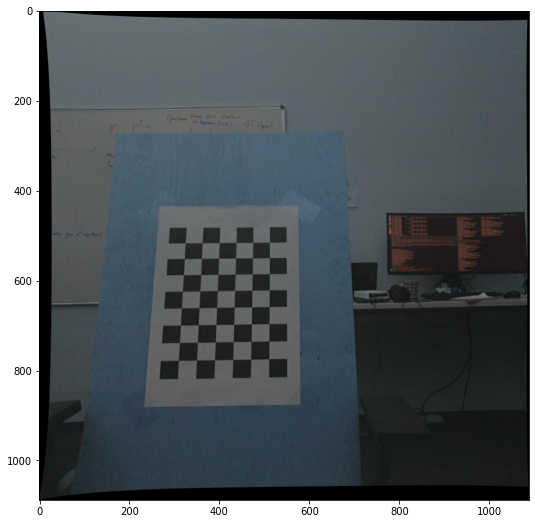

In [36]:
calib_name = 's10'
output_calib_results(intrinsics, dist_coeff, shape, images, 0, calib_name)